# Importing the Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import pickle

# Data Collection & Processing

In [3]:
# loading the data from csv file to a Pandas DataFrame
calories = pd.read_csv('calories.csv')

In [4]:
# print the first 5 rows of the dataframe
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [5]:
exercise_data = pd.read_csv('exercise.csv')

In [6]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


# Combining the two Dataframes

In [7]:
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)

In [8]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [9]:
calories_data["Weight"] = calories_data["Weight"]*0.453592
calories_data["Height"] = calories_data["Height"]*0.01

In [10]:
# checking the number of rows and columns
calories_data.shape

(15000, 9)

In [11]:
# getting some informations about the data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [12]:
# checking for missing values
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

# Data Analysis

In [13]:
# get some statistical measures about the data
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,1.744651,34.004371,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,0.142581,6.820054,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,1.230000,16.329312,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,1.640000,28.576296,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,1.750000,33.565808,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,1.850000,39.462504,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,2.220000,59.874144,30.000000,128.000000,41.500000,314.000000


# Data Visualization

In [14]:
sns.set()

C:\Users\sruja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

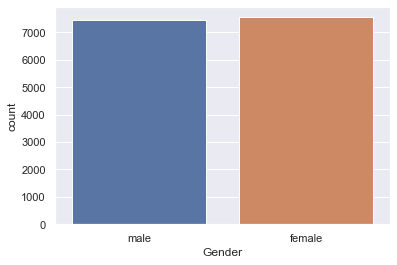

In [15]:
# plotting the gender column in count plot
sns.countplot(calories_data['Gender'])

C:\Users\sruja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

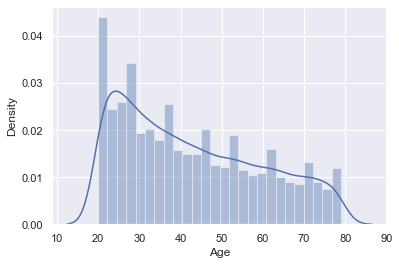

In [16]:
# finding the distribution of "Age" column
sns.distplot(calories_data['Age'])

C:\Users\sruja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

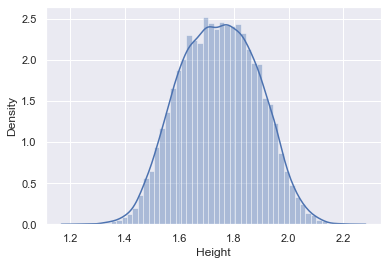

In [17]:
# finding the distribution of "Height" column
sns.distplot(calories_data['Height'])

C:\Users\sruja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

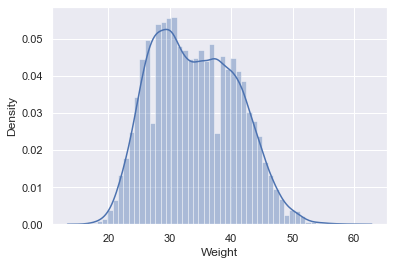

In [18]:
# finding the distribution of "Weight" column
sns.distplot(calories_data['Weight'])

# Finding the Correlation in the dataset

**1. Positive Correlation**

**2. Negative Correlation**

In [19]:
correlation = calories_data.corr()

<AxesSubplot:>

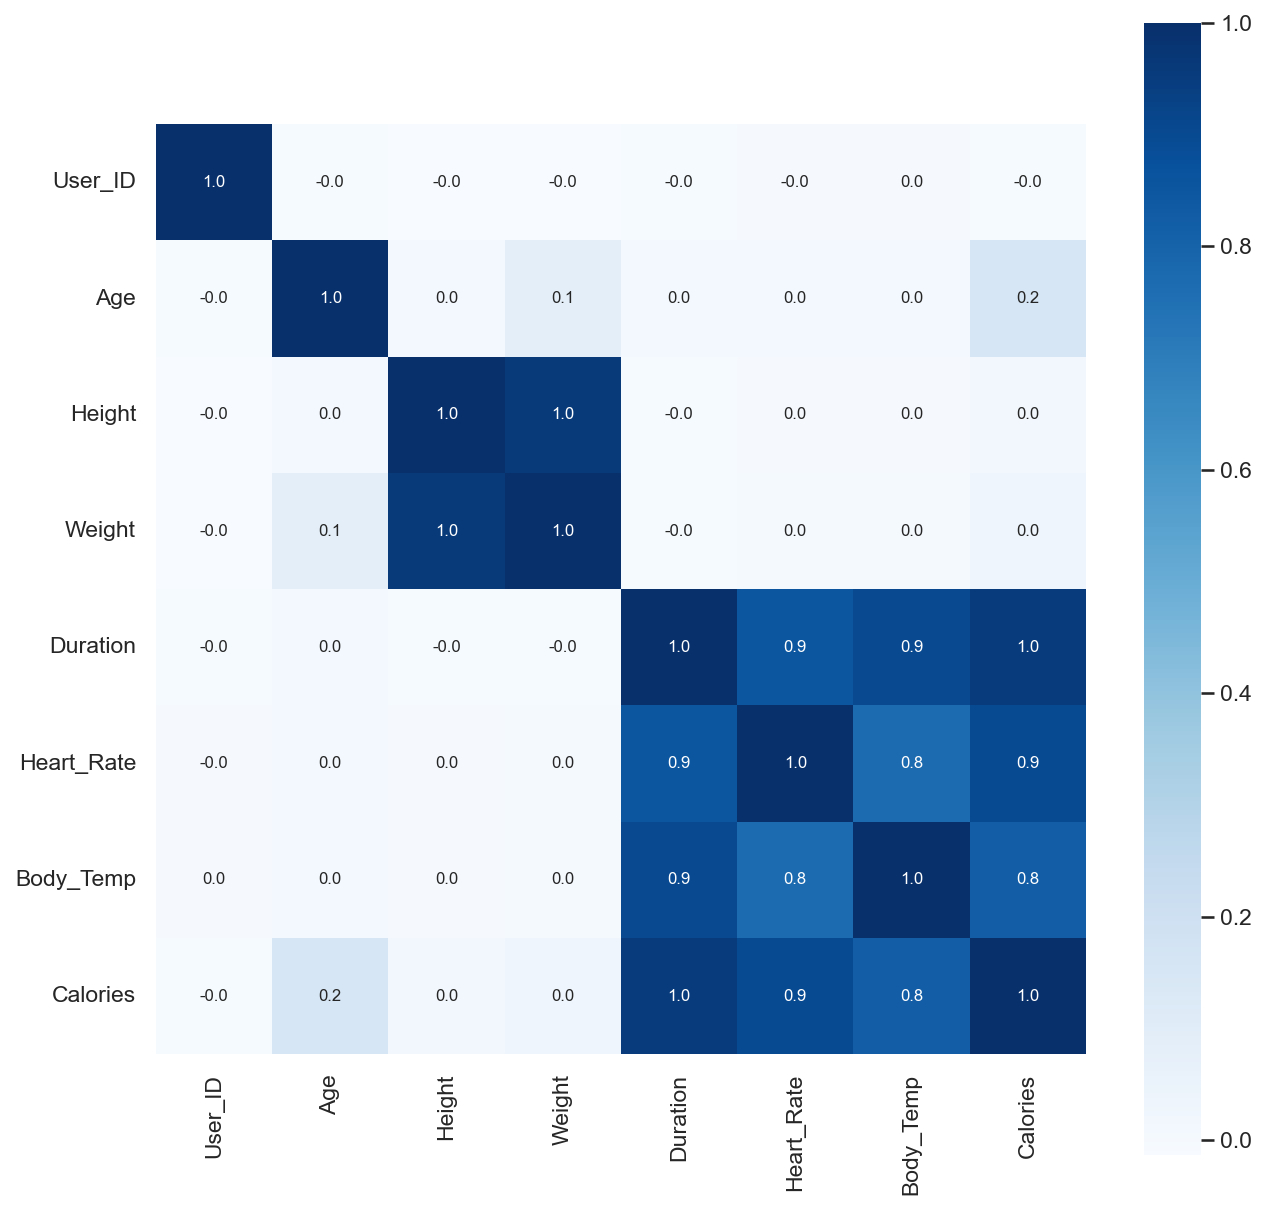

In [20]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(10,10),dpi=150)
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')


# Converting the text data to numerical values

In [21]:
calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)

In [22]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,1.90,42.637648,29.0,105.0,40.8,231.0
1,14861698,1,20,1.66,27.215520,14.0,94.0,40.3,66.0
2,11179863,0,69,1.79,35.833768,5.0,88.0,38.7,26.0
3,16180408,1,34,1.79,32.205032,13.0,100.0,40.5,71.0
4,17771927,1,27,1.54,26.308336,10.0,81.0,39.8,35.0


In [23]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  int64  
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 1.0 MB


# Separating features and Target

In [24]:
X = calories_data.drop(columns=['User_ID','Calories'], axis=1)
Y = calories_data['Calories']

In [25]:
print(X)

       Gender  Age  Height     Weight  Duration  Heart_Rate  Body_Temp
0           0   68    1.90  42.637648      29.0       105.0       40.8
1           1   20    1.66  27.215520      14.0        94.0       40.3
2           0   69    1.79  35.833768       5.0        88.0       38.7
3           1   34    1.79  32.205032      13.0       100.0       40.5
4           1   27    1.54  26.308336      10.0        81.0       39.8
...       ...  ...     ...        ...       ...         ...        ...
14995       1   20    1.93  39.008912      11.0        92.0       40.4
14996       1   27    1.65  29.483480       6.0        85.0       39.2
14997       1   43    1.59  26.308336      16.0        90.0       40.1
14998       0   78    1.93  43.998424       2.0        84.0       38.3
14999       0   63    1.73  35.833768      18.0        92.0       40.5

[15000 rows x 7 columns]


In [26]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


# Splitting the data into training data and Test data

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [30]:
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()
lr = LinearRegression()

DecisionTreeRegressor()
R2 score is  0.9927309863579873
R2 score for train is  1.0



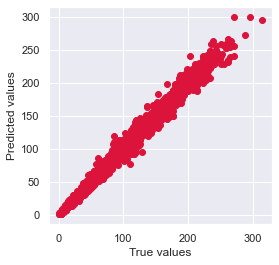

KNeighborsRegressor()
R2 score is  0.9918932455119047
R2 score for train is  0.9942493000138483



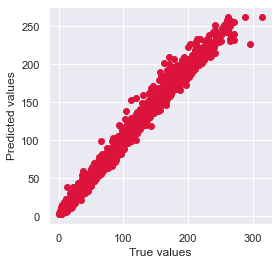

LinearRegression()
R2 score is  0.9663275127619021
R2 score for train is  0.9675689502381044



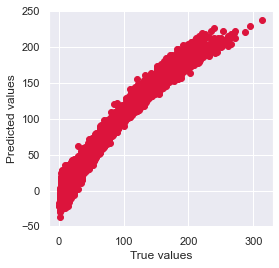

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=42)
for i in [dt, knn, lr]:
  i.fit(x_train,y_train)
  pred = i.predict(x_test)
  test_score = r2_score(y_test, pred)
  train_score = r2_score(y_train, i.predict(x_train))
  print(i)
  print("R2 score is ", r2_score(y_test, pred))
  print("R2 score for train is ", r2_score(y_train, i.predict(x_train)))
  print()
  plt.figure(figsize=(4,4))
  plt.xlabel("True values")
  plt.ylabel("Predicted values")
  plt.scatter(y_test, i.predict(x_test),c="crimson")
  plt.show()

In [36]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

rfr = RandomForestRegressor()
ad = AdaBoostRegressor()
gd = GradientBoostingRegressor()

RandomForestRegressor()
R2 score is  0.9977784528914051
R2 score for train is  0.9996634971720462



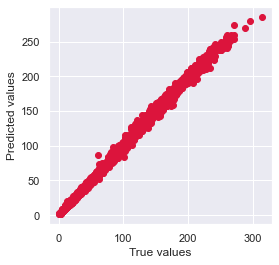

AdaBoostRegressor()
R2 score is  0.9627502316385456
R2 score for train is  0.9624819186788165



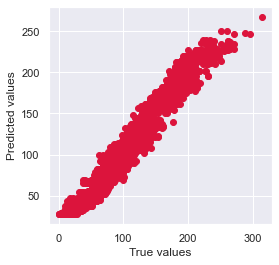

GradientBoostingRegressor()
R2 score is  0.9964244423559181
R2 score for train is  0.9968589639982252



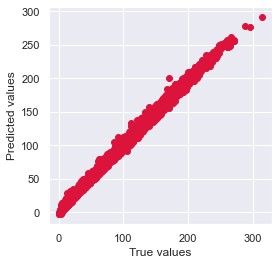

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=42)
for i in [rfr, ad, gd]:
  i.fit(x_train,y_train)
  pred = i.predict(x_test)
  test_score = r2_score(y_test, pred)
  train_score = r2_score(y_train, i.predict(x_train))
  print(i)
  print("R2 score is ", r2_score(y_test, pred))
  print("R2 score for train is ", r2_score(y_train, i.predict(x_train)))
  print()
  plt.figure(figsize=(4,4))
  plt.xlabel("True values")
  plt.ylabel("Predicted values")
  plt.scatter(y_test, i.predict(x_test),c="crimson")
  plt.show()

# Model Training

**Random Forest Regressor**

In [34]:
# loading the model
model = RandomForestRegressor(n_estimators=10)

In [35]:
# training the model with X_train
model.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=10)

# Evaluation

**Prediction on Test Data**

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)
model = RandomForestRegressor(n_estimators=10)
model.fit(x_train,y_train)
pred = model.predict(x_test)
print("R2 score", r2_score(y_test,pred))
print('R2 for train data',r2_score(y_train,i.predict(x_train)))

R2 score 0.9972813465968213
R2 for train data 0.9965120162117098


# Mean Absolute Error

In [37]:
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)

NameError: name 'test_data_prediction' is not defined

In [ ]:
print("Mean Absolute Error = ", mae)

# Building a predictive System

In [ ]:
input_data = (0,68,190.0,94.0,29.0,105.0,40.8)

input_data_as_array = np.asarray(input_data)

input_data_reshape = input_data_as_array.reshape(1,-1)

prediction = model.predict(input_data_reshape)

print(prediction)

In [ ]:
def get_BMI(weight, height):
    return weight/(height*height)

In [ ]:
def original_BMI(BMI):
    if BMI < 18.5:
        return "Underweight"
    elif BMI < 24.9:
        return "Normalweight. Good job, keep going."
    elif BMI < 29.9:
        return "Overweight"
    elif BMI < 34.9:
        return "Obesity class 1"
    elif BMI < 39.9:
        return "Obesity class 2"
    else:
        return "Obesity class 3"

In [ ]:
xt = {"Age": 33, "Height":1.79, "Weight":65.0,"Duration":30.0, "Heart_Rate":85.0, "Body_Temp":40.8, "Sex":1}
print("Your current BMI is", get_BMI(xt["Weight"],xt["Height"]))
print("You comes under", original_BMI(get_BMI(xt["Weight"],xt["Height"])))

In [ ]:
pickle.dump(model, open("model.pkl", "wb"))

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, model.predict(x_test),c="crimson")
plt.show()